<a href="https://colab.research.google.com/github/Wan-Shi-Tong-bi/5Ws/blob/main/colab/1.04_WorkingWithSequencingReads-start.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# On Unix you could use wget to download the fasta file (just uncomment the following line)
!wget http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq

# On Windows you have to download the file manually into your working directory

--2021-11-15 15:12:40--  http://d28rh4a8wq0iu5.cloudfront.net/ads1/data/SRR835775_1.first1000.fastq
Resolving d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)... 13.224.2.8, 13.224.2.74, 13.224.2.54, ...
Connecting to d28rh4a8wq0iu5.cloudfront.net (d28rh4a8wq0iu5.cloudfront.net)|13.224.2.8|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 224786 (220K) [application/octet-stream]
Saving to: ‘SRR835775_1.first1000.fastq’

SRR835775_1.first10 100%[===================>] 219.52K   808KB/s    in 0.3s    

2021-11-15 15:12:40 (808 KB/s) - ‘SRR835775_1.first1000.fastq’ saved [224786/224786]



In [5]:
def readFastq(filename):
    """ Reads a fastq file and returns a list of sequences and a list of qualities 
        param filename: valid filename
        return sequences, qualities
    """
    sequences = []
    qualities = []
    with open(filename) as fh:
        while True:
            fh.readline() # skip name line
            seq = fh.readline().rstrip() # read base sequence
            fh.readline() # skip placeholder line
            qual = fh.readline().rstrip() #base quality line
            if len(seq) == 0:
                break
            sequences.append(seq)
            qualities.append(qual)
    return sequences, qualities
seqs, quals = readFastq('SRR835775_1.first1000.fastq')

In [6]:
def phred33ToQ(qual):
    """ Converts quality to int
    """
    return ord(qual) - 33

In [7]:
def createHist(qualityStrings):
    """ Creates a historgram of qualities 
        param qualityStrings: list of qualities
        return: numbers of occurences of each quality"""
    # Create a histogram of quality scores (max of 50)
    hist = [0]*50
    for read in qualityStrings:
        for phred in read:
            q = phred33ToQ(phred)
            hist[q] += 1
    return hist
h = createHist(quals)
print(h)

[0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0]


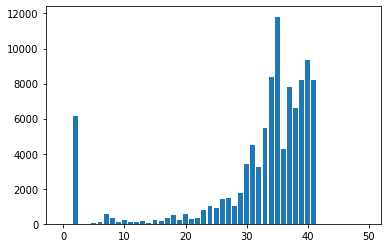

In [8]:
# Plot the histogram
%matplotlib inline
import matplotlib.pyplot as plt
plt.bar(range(len(h)), h)
plt.show()

In [9]:
import unittest
class TestNotebook(unittest.TestCase):    
    def test_notebook(self):
        self.assertEquals(h, [0, 0, 6178, 0, 0, 54, 108, 574, 345, 83, 193, 124, 79, 165, 49, 236, 184, 327, 514, 238, 531, 254, 313, 798, 992, 888, 1396, 1488, 993, 1752, 3387, 4487, 3248, 5476, 8375, 11814, 4243, 7827, 6579, 8179, 9349, 8180, 0, 0, 0, 0, 0, 0, 0, 0])
        
        
unittest.main(argv=[''], verbosity=2, exit=False)

test_notebook (__main__.TestNotebook) ... /usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: Please use assertEqual instead.
  after removing the cwd from sys.path.
ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK
